### Importamos las librerias necesarias 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3 

## Creamos la conexion con sqlite3 y realizamos la consulta(10 productos mas vendidos) 

In [64]:
conn = sqlite3.connect ('Northwind.db')
query='''
    SELECT ProductName, SUM(Price * Quantity) as Revenue
    FROM OrderDetails 
    INNER JOIN Products ON products.ProductID = OrderDetails.ProductID
    GROUP BY OrderDetails.ProductID
    ORDER BY Revenue DESC
    LIMIT 10 
'''


## Leemos la consulta y nos retorna una respuesta utlizando pandas 

In [65]:
top_products =pd.read_sql_query(query,conn)

## Se imprime la consulta requerida 

In [66]:
print(top_products)

               ProductName   Revenue
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00
5             Alice Mutton  12909.00
6   Gnocchi di nonna Alice  10222.00
7   Mozzarella di Giovanni   9396.00
8             Vegie-spread   9175.10
9    Manjimup Dried Apples   8639.00


## Graficamos la consulta 

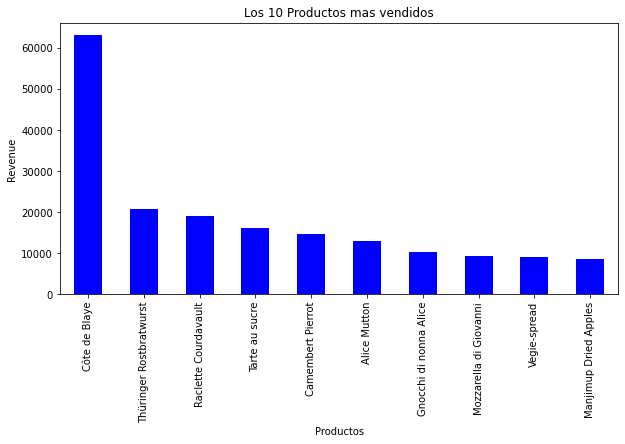

In [67]:
top_products.plot (x='ProductName',y='Revenue',kind='bar',color='blue',figsize=(10,5),legend=False)

plt.title('Los 10 Productos mas vendidos')
plt.xlabel('Productos')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

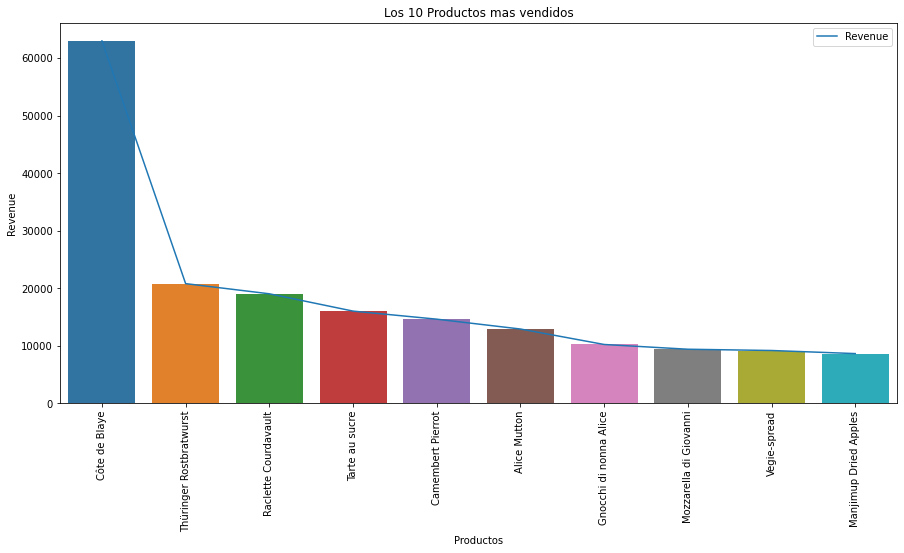

In [69]:
top_products.plot(figsize=(15,7))
sns.barplot(data=top_products,x='ProductName',y='Revenue')

plt.title('Los 10 Productos mas vendidos')
plt.xlabel('Productos')
plt.ylabel('Revenue')
plt.xticks(rotation=90)

plt.show()

## Hacemos la consulta de los 10 empleados mas efectivos  

In [77]:
query2='''
    SELECT FirstName || ' ' || LastName as Employee, COUNT(*) as Total
    FROM Orders
    INNER JOIN Employees
    ON Employees.EmployeeID = Orders.EmployeeID
    GROUP BY Orders.EmployeeID
    ORDER BY Total ASC
    LIMIT 3 
    
    
'''


## Leemos la consulta y nos retorna una respuesta utlizando pandas 

In [78]:
top_employees=pd.read_sql_query(query2,conn)

## Graficamos la consulta 

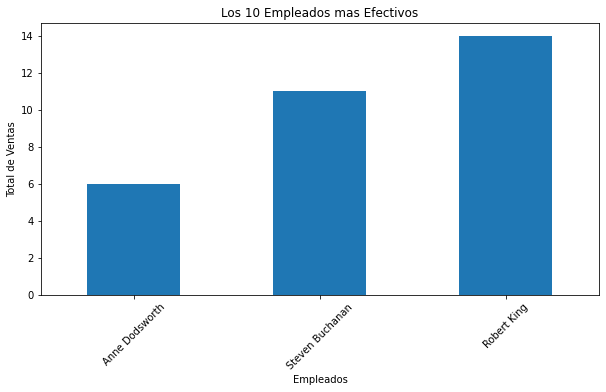

In [79]:
top_employees.plot (x='Employee',y='Total',kind='bar',figsize=(10,5),legend=False)

plt.title('Los 10 Empleados mas Efectivos')
plt.xlabel('Empleados')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.show()

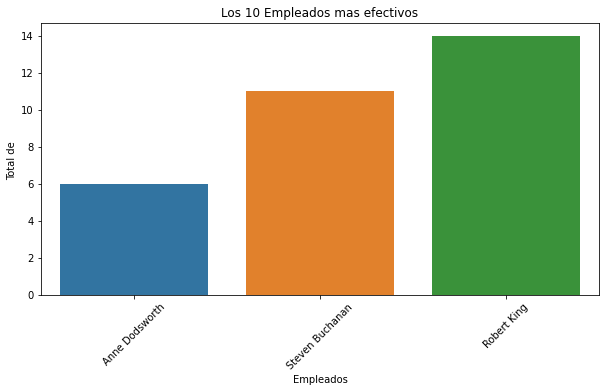

In [81]:
fig, ax =plt.subplots(figsize=(10,5))
sns.barplot(data=top_employees,x='Employee',y='Total')

plt.title('Los 10 Empleados mas efectivos')
plt.xlabel('Empleados')
plt.ylabel('Total de ')
plt.xticks(rotation=45)

plt.show()